In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data file as variable
stroke_predictive_path = "data/healthcare-dataset-stroke-data.csv"

In [2]:
# Read .csv file
stroke_predictive_df = pd.read_csv(stroke_predictive_path)

# Display preview of data
stroke_predictive_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Find number of individual participants
stroke_predictive_df["id"].nunique()
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Change columns to all lower case to match
stroke_predictive_df = stroke_predictive_df.rename(columns=str.lower)
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Check of dublicate IDs
# None found
duplicate_check = stroke_predictive_df.drop_duplicates(subset=["id"])
print(len(duplicate_check))

5110


In [6]:
# Check if any columns should be dropped
# All look appropriate, but bmi has 111 fewer rows of data
stroke_predictive_df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [7]:
# Drop rows with missing data so all match bmi's total
stroke_predictive = stroke_predictive_df.dropna(how='any')
stroke_predictive.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [8]:
# 895 subjects are minors 18 and under
# 574 subjects are children 12 and under
# 953 subjects are sections 65 and over

minor_check = stroke_predictive[stroke_predictive.age <= 18]
senior_check = stroke_predictive[stroke_predictive.age >= 65]
child_check = stroke_predictive[stroke_predictive.age <= 12]
print(minor_check["id"].nunique(), 
      child_check["id"].nunique(), 
      senior_check["id"].nunique())

895 574 953


In [9]:
# Unique entries for column work_type (5)
# Clean
stroke_predictive["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
# Unique entries for column ever_married (2)
# Clean
stroke_predictive["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# Unique entries for column residence_type (2)
# Clean
stroke_predictive["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [13]:
# Unique entries for column smoking_status (4)
# Clean
stroke_predictive["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
stroke_predictive.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# The Correlation Between BMI and Stroke Occurrence

C:\Users\janak\AppData\Local\Temp\ipykernel_25272\2433213897.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_stroke_group = stroke_predictive_bmi_df.groupby(['bmi_category', 'stroke']).size().unstack(fill_value=0)


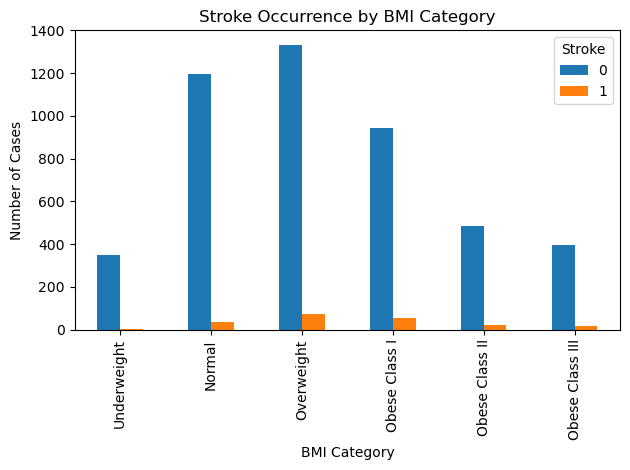

In [49]:
# Define BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']

# Create a copy of the school summary for later aggregations
stroke_predictive_bmi_df = stroke_predictive.copy()

# Add a BMI category column
stroke_predictive_bmi_df['bmi_category'] = pd.cut(stroke_predictive_bmi_df['bmi'], bmi_bins, labels=bmi_labels, include_lowest=True)

# Group by BMI category and stroke occurrence
#used this link to know how to use unstack https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
bmi_stroke_group = stroke_predictive_bmi_df.groupby(['bmi_category', 'stroke']).size().unstack(fill_value=0)

# Plot bar chart
bmi_stroke_group.plot(kind='bar')
plt.title('Stroke Occurrence by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cases')

plt.legend(title='Stroke')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\janak\AppData\Local\Temp\ipykernel_25272\289176984.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_gender_group = stroke_predictive_bmi_df.groupby(['bmi_category', 'gender']).size().unstack(fill_value=0)


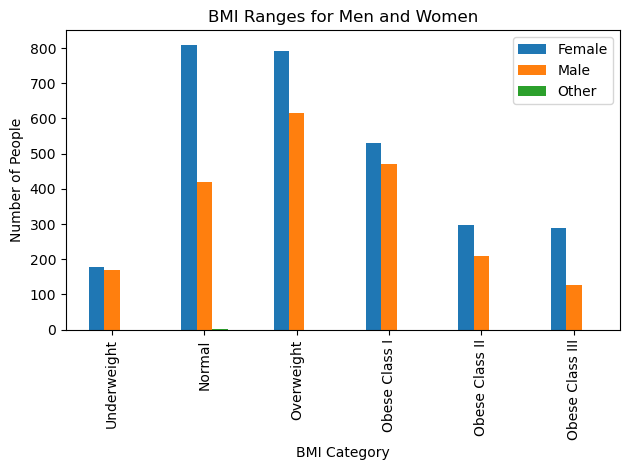

In [47]:
# Group by gender and BMI category
bmi_gender_group = stroke_predictive_bmi_df.groupby(['bmi_category', 'gender']).size().unstack(fill_value=0)

# Plot stacked bar chart
bmi_gender_group.plot(kind='bar')
plt.title('BMI Ranges for Men and Women')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\janak\AppData\Local\Temp\ipykernel_25272\1730398587.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['age_group'] = pd.cut(stroke_patients['age'], bins=age_bins, labels=age_labels)
C:\Users\janak\AppData\Local\Temp\ipykernel_25272\1730398587.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_stroke_patients['age_group'] = pd.cut(no_stroke_patients['age'], bins=age_bins, labels=age_labels)
C:\Users\janak\AppData\Local\Temp\ipykernel_25272\1730398587.py:12: FutureWarning: The d

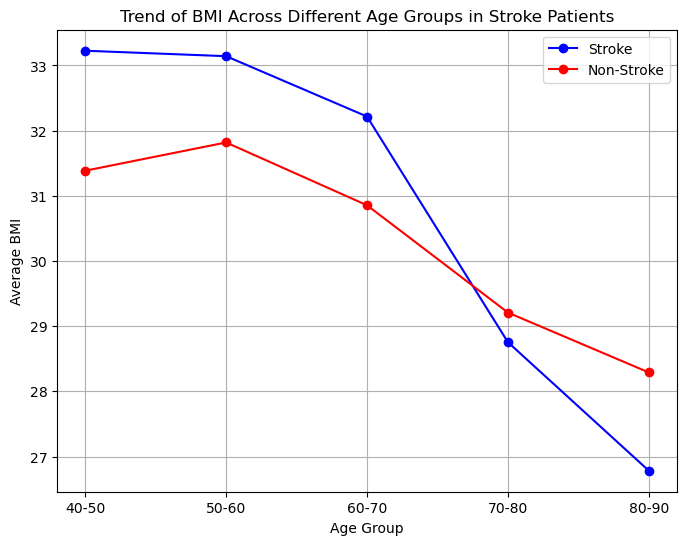

In [44]:
stroke_patients = stroke_predictive[stroke_predictive['stroke'] == 1]
no_stroke_patients = stroke_predictive[stroke_predictive['stroke'] == 0]

# Optional: Create age groups or bins for more structured trends
# Group patients into age ranges (bins)
age_bins = [40, 50, 60, 70, 80, 90]  # Define age ranges
age_labels = ['40-50', '50-60', '60-70', '70-80', '80-90']  # Label each range
stroke_patients['age_group'] = pd.cut(stroke_patients['age'], bins=age_bins, labels=age_labels)
no_stroke_patients['age_group'] = pd.cut(no_stroke_patients['age'], bins=age_bins, labels=age_labels)

# Calculate average BMI for each age group
avg_bmi_by_age = stroke_patients.groupby('age_group')['bmi'].mean()
no_avg_bmi_by_age = no_stroke_patients.groupby('age_group')['bmi'].mean()

# Plot the trend of BMI across age groups
plt.figure(figsize=(8,6))

# Plotting the line chart
plt.plot(avg_bmi_by_age.index, avg_bmi_by_age.values, marker='o', linestyle='-', color='blue', label='Stroke')
plt.plot(no_avg_bmi_by_age.index, no_avg_bmi_by_age.values, marker='o', linestyle='-', color='red', label='Non-Stroke')

# Add titles and labels
plt.title('Trend of BMI Across Different Age Groups in Stroke Patients')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')

# Show the plot
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

# Average Glucose Level Correlate With Stroke Occurrence

C:\Users\janak\AppData\Local\Temp\ipykernel_25272\2008978277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_predictive['age_group'] = pd.cut(stroke_predictive['age'], bins=bins, labels=labels, right=False)
C:\Users\janak\AppData\Local\Temp\ipykernel_25272\2008978277.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_stroke = df_stroke.groupby('age_group')['avg_glucose_level'].mean()
C:\Users\janak\AppData\Local\Temp\ipykernel_25272\2008978277.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to 

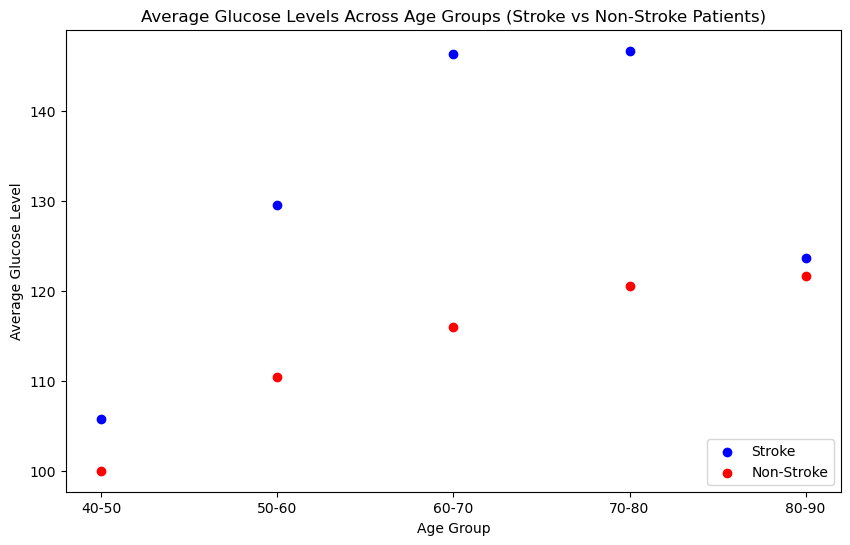

In [41]:
# Create age groups (bins)
bins = [40, 50, 60, 70, 80, 90]
labels = ['40-50', '50-60', '60-70', '70-80', '80-90']
stroke_predictive['age_group'] = pd.cut(stroke_predictive['age'], bins=bins, labels=labels, right=False)

# Filter for stroke and non-stroke patients
df_stroke = stroke_predictive[stroke_predictive['stroke'] == 1]
df_no_stroke = stroke_predictive[stroke_predictive['stroke'] == 0]

# Calculate average glucose levels for each age group (stroke patients)
age_group_avg_stroke = df_stroke.groupby('age_group')['avg_glucose_level'].mean()

# Calculate average glucose levels for each age group (non-stroke patients)
age_group_avg_no_stroke = df_no_stroke.groupby('age_group')['avg_glucose_level'].mean()

# Plotting the scatter plots
plt.figure(figsize=(10,6))

# Scatter plot for stroke patients
plt.scatter(age_group_avg_stroke.index, age_group_avg_stroke.values, color='blue', label='Stroke')

# Scatter plot for non-stroke patients
plt.scatter(age_group_avg_no_stroke.index, age_group_avg_no_stroke.values, color='red', label='Non-Stroke')

# Add titles and labels
plt.title('Average Glucose Levels Across Age Groups (Stroke vs Non-Stroke Patients)')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')

# Add a legend
plt.legend(loc="lower right")

# Show the plot
plt.show()

1 potential outliers: Series([], Name: avg_glucose_level, dtype: float64)
0 potential outliers: 254     210.95
256     243.53
258     205.84
272     198.21
277     206.72
         ...  
5062    211.58
5063    179.38
5064    193.88
5076    174.37
5108    166.29
Name: avg_glucose_level, Length: 504, dtype: float64


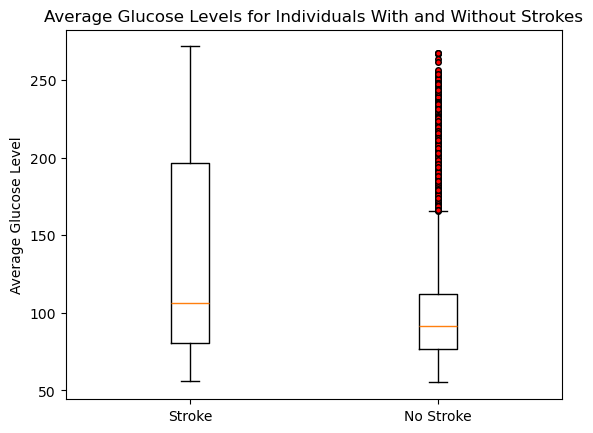

In [28]:
# Stroke categories
stroke_categories = [1, 0]  # 1 = Stroke, 0 = No Stroke
glucose_levels = []

# Calculate IQR and potential outliers for each stroke group
for stroke in stroke_categories:
    
    # Locate the rows which contain individuals with and without strokes and get avg glucose levels
    stroke_data = stroke_predictive[stroke_predictive['stroke'] == stroke]['avg_glucose_level']
    
    # Add glucose levels to the list (for plotting)
    glucose_levels.append(stroke_data)
    
    # Calculate quartiles and IQR
    quartiles = stroke_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = stroke_data[(stroke_data < lower_bound) | (stroke_data > upper_bound)]
    
    # Print the outliers
    # stroke_label = "Stroke" if stroke == 1 else "No Stroke"
    print(f"{stroke} potential outliers: {outliers}")

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#Creating a figure and axis for the box plot using subplots
fig, ax = plt.subplots()

#Generating the box plot for the tumor_volumes data for the four treatments
bp = ax.boxplot(glucose_levels,labels=stroke_categories)

#Customize plot
ax.set_title('Average Glucose Levels for Individuals With and Without Strokes')
ax.set_ylabel('Average Glucose Level')
ax.set_xticklabels(['Stroke', 'No Stroke'])

#Customizing the appearance of the outliers (fliers) in the box plot
plt.setp(bp['fliers'], marker='o', markerfacecolor='r', markersize=4, linestyle='none')

#Displaying the box plot chart
plt.show()
